In [ ]:
# Step 1: Extract the ZIP file
import zipfile
import os

zip_path = 'FruitinAmazon.zip'
extract_dir = 'dataset'

# Create the extract directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted ZIP file to {extract_dir}")

Extracted ZIP file to dataset


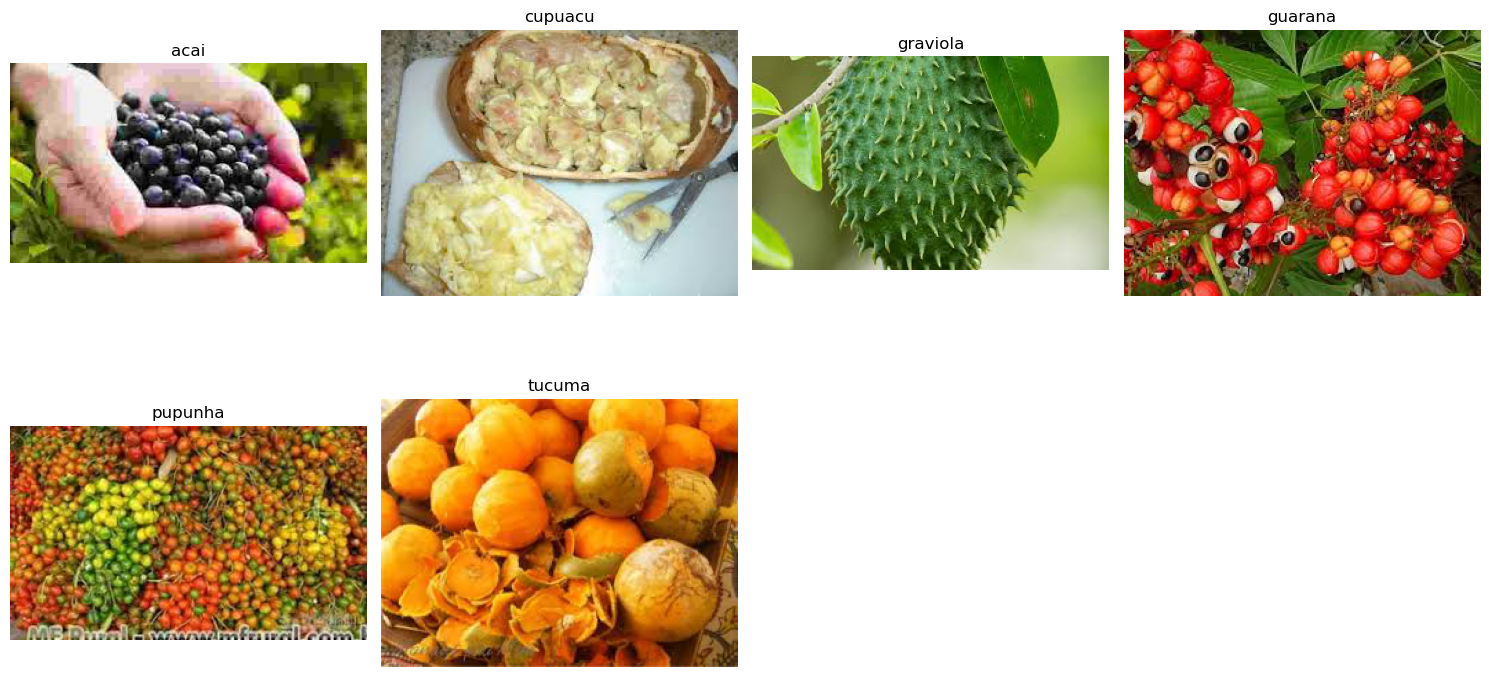

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

train_dir = 'dataset/FruitinAmazon/train'

# Get class names (folder names)
class_names = sorted(os.listdir(train_dir))

# Set up the plot
plt.figure(figsize=(15, 8))
columns = 5  # Adjust columns as needed

for i, class_name in enumerate(class_names):
    class_folder = os.path.join(train_dir, class_name)
    image_name = random.choice(os.listdir(class_folder))
    image_path = os.path.join(class_folder, image_name)

    image = Image.open(image_path)

    plt.subplot(2, len(class_names) // 2 + 1, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image, UnidentifiedImageError

corrupted_images = []
total_checked = 0

for class_name in class_names:
    class_folder = os.path.join(train_dir, class_name)
    for filename in os.listdir(class_folder):
        file_path = os.path.join(class_folder, filename)
        try:
            img = Image.open(file_path)
            img.verify()
            total_checked += 1
        except (IOError, SyntaxError, UnidentifiedImageError):
            print(f"Removed corrupted image: {file_path}")
            corrupted_images.append(file_path)
            os.remove(file_path)

if not corrupted_images:
    print("No Corrupted Images Found.")
else:
    print(f"Total corrupted images removed: {len(corrupted_images)}")
print(f"Total images checked: {total_checked}")


No Corrupted Images Found.
Total images checked: 90


In [ ]:
import tensorflow as tf

# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2
train_dir = "dataset/FruitinAmazon/train"


In [ ]:
# Rescaling layer to normalize pixel values to [0, 1]
rescale = tf.keras.layers.Rescaling(1./255)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
import os

num_classes = len(os.listdir(train_dir))
print(f"Number of classes: {num_classes}")


Number of classes: 6


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Summary of the model
model.summary()


C:\Users\User\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_cb = ModelCheckpoint(
    "best_model.h5", save_best_only=True, monitor='val_loss', mode='min'
)

earlystop_cb = EarlyStopping(
    patience=10, restore_best_weights=True, monitor='val_loss', mode='min'
)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=[checkpoint_cb, earlystop_cb]
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.1655 - loss: 1.9956

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 559ms/step - accuracy: 0.1623 - loss: 2.0222 - val_accuracy: 0.0000e+00 - val_loss: 2.2046
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.2083 - loss: 1.7599

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.2188 - loss: 1.7548 - val_accuracy: 0.7778 - val_loss: 1.3674
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.3624 - loss: 1.6368 - val_accuracy: 0.6111 - val_loss: 1.5291
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.5490 - loss: 1.3934 - val_accuracy: 0.3889 - val_loss: 1.6576
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7106 - loss: 1.1159

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 456ms/step - accuracy: 0.7066 - loss: 1.1183 - val_accuracy: 0.7778 - val_loss: 0.7742
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.5903 - loss: 1.0925 - val_accuracy: 0.6667 - val_loss: 1.3382
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.7891 - loss: 0.8358 - val_accuracy: 0.2222 - val_loss: 1.8848
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.8051 - loss: 0.7165 - val_accuracy: 0.5556 - val_loss: 0.9034
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8953 - loss: 0.5027

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step - accuracy: 0.8937 - loss: 0.5070 - val_accuracy: 0.8889 - val_loss: 0.4697
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.9566 - loss: 0.3086 - val_accuracy: 0.8333 - val_loss: 0.6938
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.9822 - loss: 0.2115 - val_accuracy: 0.7222 - val_loss: 1.0469
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.9596 - loss: 0.1432 - val_accuracy: 0.8333 - val_loss: 0.6787
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.9891 - loss: 0.1116 - val_accuracy: 0.8333 - val_loss: 0.4843
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 1.0000 - loss: 0.0453 - val_accuracy: 0.8333 - val_loss: 0.6587
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 1.0000 - loss: 0.0762

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - accuracy: 1.0000 - loss: 0.0767 - val_accuracy: 0.8333 - val_loss: 0.4631
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 1.0000 - loss: 0.0175

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step - accuracy: 1.0000 - loss: 0.0168 - val_accuracy: 0.8889 - val_loss: 0.3759
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.9705 - loss: 0.0544 - val_accuracy: 0.8889 - val_loss: 0.4255
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.8333 - val_loss: 0.5557
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 0.8333 - val_loss: 0.6266
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 1.0000 - loss: 0.0131 - val_accuracy: 0.8333 - val_loss: 0.5462
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.8333 - val_loss: 0.4071
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 1.0000 - loss: 0.0036

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 410ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.8333 - val_loss: 0.3477
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 1.0000 - loss: 0.0029

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.8889 - val_loss: 0.3215
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.0032

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.8889 - val_loss: 0.3167
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.0019

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8889 - val_loss: 0.3162
Epoch 26/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8889 - val_loss: 0.3335
Epoch 27/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8333 - val_loss: 0.3739
Epoch 28/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8333 - val_loss: 0.4105
Epoch 29/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.8333 - val_loss: 0.4350
Epoch 30/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 1.0000 - loss: 8.4040e-04 - val_accuracy: 0.8333 - val_loss: 0.4510
Epoch 31/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 1.0000 - loss: 7.0349e-04 - val_accuracy: 0.8333 - val_loss: 0.4652
Epoch 32/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 1.0000 - loss: 5.8948e-04 - val_accuracy: 0.8

In [ ]:
test_dir = 'dataset/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

test_ds = test_ds.map(lambda x, y: (rescale(x), y))


Found 30 files belonging to 6 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.7667 - loss: 0.6427
Test Accuracy: 0.7667
Test Loss: 0.6427


In [ ]:
model.save("final_fruit_model.h5")


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("final_fruit_model.h5")


In [ ]:
loss, acc = loaded_model.evaluate(test_ds)
print(f"Loaded Model Accuracy: {acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step - accuracy: 0.7667 - loss: 0.6427
Loaded Model Accuracy: 0.7667


In [ ]:
import numpy as np

# Get true labels
y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())

# Get predictions
y_pred_probs = loaded_model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


In [ ]:
# Load test dataset (again if needed)
raw_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Get class names BEFORE mapping
class_names = raw_test_ds.class_names

# Then normalize and use for testing
test_ds = raw_test_ds.map(lambda x, y: (rescale(x), y))


Found 30 files belonging to 6 classes.


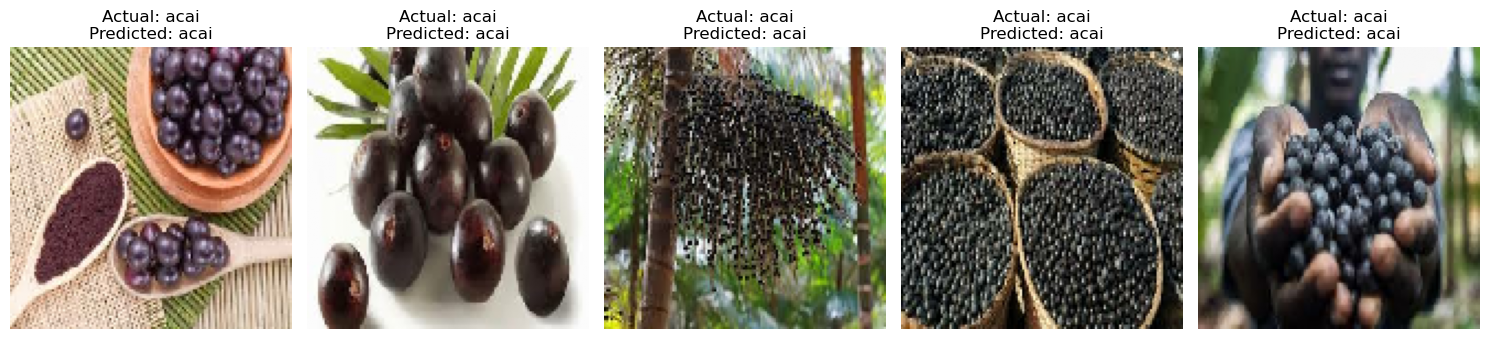

In [ ]:
# Use the raw_test_ds (not normalized) for display
for images, labels in raw_test_ds.take(1):
    plt.figure(figsize=(15, 5))
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        # No need for .astype("uint8") if image is already in displayable format
        plt.imshow(images[i].numpy() / 255.0)  # Use this to scale to [0,1] for matplotlib
        actual = class_names[labels[i]]
        predicted = class_names[y_pred[i]]
        plt.title(f"Actual: {actual}\nPredicted: {predicted}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
